In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import spearmanr

import unicodedata
import os
import numpy as np
import random

In [2]:
def get_score(y_true, y_pred):
    """get MAPE score"""
    score = mean_absolute_percentage_error(y_true, y_pred)
    return score * 100

def seed_everything(seed):
    """fix random factors"""
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
seed_everything(42)

In [3]:
train = pd.read_csv("data/train.csv")
print(train.shape)
display(train.describe())
print(train.isnull().sum())
train.head()

(27532, 16)


,id,year,odometer,price
count,27532.000000,27532.000000,2.753200e+04,27532.000000
mean,13765.500000,2007.832958,1.160199e+05,13468.724829
std,7947.948142,15.758976,6.451642e+04,10962.149840
min,0.000000,1921.000000,-1.318690e+05,1004.000000
25%,6882.750000,2005.000000,7.836775e+04,5759.000000
50%,13765.500000,2011.000000,1.114445e+05,9206.000000
75%,20648.250000,2014.000000,1.508562e+05,19128.000000
max,27531.000000,3017.000000,2.946000e+06,96818.000000


id                 0
region             0
year               0
manufacturer       0
condition          0
cylinders          0
fuel            1239
odometer           0
title_status     456
transmission       0
drive              0
size               0
type             456
paint_color        0
state           3304
price              0
dtype: int64


,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [4]:
test = pd.read_csv("data/test.csv")
print(test.shape)
display(test.describe())
print(test.isnull().sum())
test.head()

(27537, 15)


,id,year,odometer
count,27537.000000,27537.000000,27537.000000
mean,41300.000000,2007.838908,116592.779932
std,7949.391518,14.558094,59040.921780
min,27532.000000,1918.000000,-1.000000
25%,34416.000000,2005.000000,79914.000000
50%,41300.000000,2011.000000,112436.000000
75%,48184.000000,2014.000000,150338.000000
max,55068.000000,3019.000000,394595.000000


id                 0
region             0
year               0
manufacturer       0
condition          0
cylinders          0
fuel            1495
odometer           0
title_status     229
transmission       0
drive              0
size               0
type             229
paint_color        0
state           3029
dtype: int64


,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,27532,western slope,2015,chevrolet,excellent,4 cylinders,gas,92553,clean,automatic,fwd,full-size,SUV,red,NaN
1,27533,roseburg,2013,nissan,like new,4 cylinders,gas,134385,salvage,automatic,fwd,mid-size,sedan,black,or
2,27534,akron / canton,2011,volkswagen,good,4 cylinders,gas,102489,clean,automatic,fwd,full-size,sedan,black,oh
3,27535,denver,2016,jeep,excellent,6 cylinders,diesel,64310,clean,automatic,4wd,mid-size,SUV,red,co
4,27536,hickory / lenoir,1999,honda,excellent,8 cylinders,gas,180839,rebuilt,automatic,4wd,mid-size,SUV,silver,nc


## region

"/"があるのでそれを分割する？しかし二つの要素を一つのカラムで表現するのはどうしたらよいかな？

In [5]:
train[train["region"].str.contains("muscle shoals")]["region"].unique()

array(['florence / muscle shoals'], dtype=object)

In [6]:
train["region"].value_counts(), train["region"].unique()

(region
 central NJ          1069
 rhode island         712
 rochester            522
 albany               504
 washington, DC       477
                     ... 
 the thumb              1
 ashtabula              1
 hanford-corcoran       1
 baton rouge            1
 southwest KS           1
 Name: count, Length: 372, dtype: int64,
 array(['nashville', 'state college', 'wichita', 'albany', 'redding',
        'florence / muscle shoals', 'oregon coast', 'medford-ashland',
        'richmond', 'buffalo', 'billings', 'bakersfield', 'central NJ',
        'worcester / central MA', 'eau claire', 'greenville / upstate',
        'yakima', 'washington, DC', 'palm springs', 'cincinnati',
        'rockford', 'rochester', 'lancaster', 'fort wayne', 'toledo',
        'wilmington', 'huntsville / decatur', 'orlando',
        'sarasota-bradenton', 'las cruces', 'mohave county', 'tulsa',
        'indianapolis', 'fresno / madera', 'norfolk / hampton roads',
        'duluth / superior', 'san antonio', 'we

In [7]:
test["region"].value_counts(), test["region"].unique()

(region
 central NJ              1097
 rhode island             723
 rochester                531
 albany                   530
 washington, DC           484
                         ... 
 kokomo                     1
 del rio / eagle pass       1
 fairbanks                  1
 southern WV                1
 glens falls                1
 Name: count, Length: 372, dtype: int64,
 array(['western slope', 'roseburg', 'akron / canton', 'denver',
        'hickory / lenoir', 'eugene', 'new york city', 'salt lake city',
        'gulfport / biloxi', 'st cloud', 'sarasota-bradenton',
        'central NJ', 'st louis, MO', 'albany', 'rhode island',
        'baltimore', 'san antonio', 'kansas city, MO', 'charlotte',
        'pittsburgh', 'nashville', 'north jersey', 'charleston',
        'los angeles', 'detroit metro', 'humboldt county', 'richmond',
        'tampa bay area', 'stockton', 'kennewick-pasco-richland',
        'winston-salem', 'jacksonville', 'bakersfield', 'missoula',
        'dallas / 

In [8]:
set(train["region"]) - set(test["region"]), set(test["region"]) - set(train["region"]), 

(set(), set())

In [9]:

def calculate_spearmanr(train_data, test_data, column_name):
    """
    train_data: pandas DataFrame, training dataset
    test_data: pandas DataFrame, test dataset
    column_name: str, name of the column for which Spearman's rank correlation will be calculated
    """
    # Calculate value counts for the specified column in the training and test datasets
    train_counts = train_data[column_name].value_counts().reset_index(name="train")
    test_counts = test_data[column_name].value_counts().reset_index(name="test")
    
    # Merge the two datasets on the column index
    merged_data = pd.merge(train_counts, test_counts, on=column_name)
    
    # Plot the value counts for both training and test datasets
    plt.plot(merged_data["train"], label="Train")
    plt.plot(merged_data["test"], label="Test")
    plt.legend()
    plt.xlabel("Index")
    plt.ylabel("Count")
    plt.title(f"Value Counts Comparison for '{column_name}'")
    plt.show()

    # Calculate Spearman's rank correlation coefficient and p-value
    correlation, p_value = spearmanr(merged_data["train"], merged_data["test"])

    print("順位相関係数:", correlation)
    print("p値:", p_value)
    
    # 判定基準（通常の有意水準0.05を使用）
    alpha = 0.05
    if p_value < alpha:
        print("有意です。")
    else:
        print("有意ではありません。")

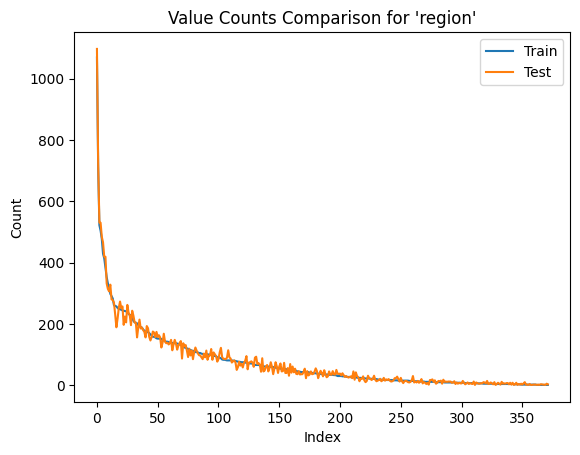

順位相関係数: 0.9801385490806529
p値: 4.4352925053454705e-262
有意です。


In [10]:
calculate_spearmanr(train, test, "region")

## year

yearのミスが多いので直す
* 3000年代は2000年代に直す
* 1922とかは2022じゃないよな

In [11]:
def pre_year(df: pd.DataFrame):
    year_dict = {
        2999:1999,
        3008:2008,
        3015:2015,
        3017:2017,
        3011:2011,
        3019:2019,
    }
    df["year"] = df["year"].replace(year_dict)
    return df

In [12]:
train["year"].value_counts(), sorted(train["year"].unique())

(year
 2013    2503
 2012    2482
 2014    2252
 2011    2127
 2015    1775
         ... 
 1932       1
 1931       1
 2999       1
 1921       1
 3015       1
 Name: count, Length: 101, dtype: int64,
 [1921,
  1922,
  1925,
  1928,
  1929,
  1930,
  1931,
  1932,
  1934,
  1935,
  1936,
  1937,
  1938,
  1939,
  1940,
  1941,
  1942,
  1943,
  1944,
  1945,
  1946,
  1947,
  1948,
  1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2999,
  3008,
  3015,

In [13]:
test["year"].value_counts(), sorted(test["year"].unique())

(year
 2012    2621
 2013    2484
 2011    2142
 2014    2086
 2015    1739
         ... 
 1918       1
 1942       1
 3015       1
 1943       1
 1933       1
 Name: count, Length: 103, dtype: int64,
 [1918,
  1920,
  1921,
  1923,
  1926,
  1928,
  1929,
  1930,
  1931,
  1932,
  1933,
  1934,
  1935,
  1936,
  1937,
  1938,
  1939,
  1940,
  1941,
  1942,
  1943,
  1944,
  1945,
  1946,
  1947,
  1948,
  1949,
  1950,
  1951,
  1952,
  1953,
  1954,
  1955,
  1956,
  1957,
  1958,
  1959,
  1960,
  1961,
  1962,
  1963,
  1964,
  1965,
  1966,
  1967,
  1968,
  1969,
  1970,
  1971,
  1972,
  1973,
  1974,
  1975,
  1976,
  1977,
  1978,
  1979,
  1980,
  1981,
  1982,
  1983,
  1984,
  1985,
  1986,
  1987,
  1988,
  1989,
  1990,
  1991,
  1992,
  1993,
  1994,
  1995,
  1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,

In [14]:
train = pre_year(train)
test = pre_year(test)

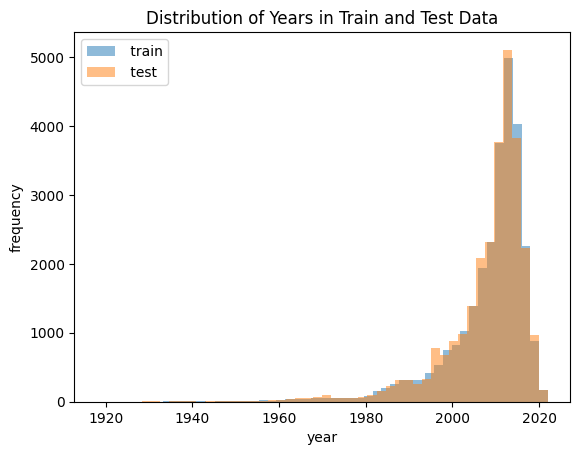

In [15]:
plt.hist(train["year"], alpha=0.5, label=" train", bins=50)
plt.hist(test["year"], alpha=0.5, label=" test", bins=50)
plt.xlabel("year")
plt.ylabel("frequency")
plt.title("Distribution of Years in Train and Test Data")
plt.legend()
plt.show()

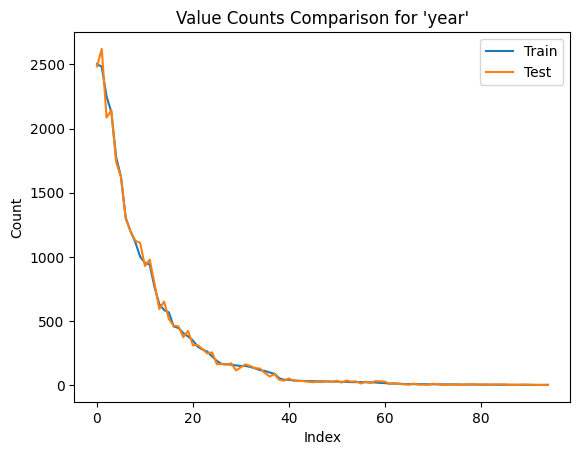

順位相関係数: 0.9714226964453537
p値: 6.935805475670073e-60
有意です。


In [16]:
calculate_spearmanr(train, test, "year")

train dataとtest dataの分布はおおよそ一緒？

## manufacturer

小文字にしても良いかな


In [17]:
def convert_full_to_half(row):
    return unicodedata.normalize('NFKC', row)

def pre_manufacture(df: pd.DataFrame):
    df["manufacturer"] = df["manufacturer"].apply(convert_full_to_half)
    return df


In [18]:
train["manufacturer"].value_counts(), train["manufacturer"].unique()

(manufacturer
 ford             6166
 chevrolet        3339
 bmw              2736
 toyota           1570
 honda            1526
                  ... 
 SΑTURN              1
 ＤＯＤＧＥ               1
 ｉｎｆｉｎｉｔｉ            1
 ｍｅｒｃｅｄｅｓ－ｂｅｎｚ       1
 ᴄhrysler            1
 Name: count, Length: 125, dtype: int64,
 array(['bmw', 'toyota', 'ford', 'nissan', 'volkswagen', 'FORD', 'lexus',
        'buick', 'subaru', 'ram', 'TOYOTA', 'dodge', 'ｂｍｗ', 'chevrolet',
        'RAM', 'BMW', 'jeep', 'ｃｈｅｖｒｏｌｅｔ', 'honda', 'NISSAN', 'hyundai',
        'chrysler', 'gmc', 'mazda', 'audi', 'lincoln', 'kia',
        'mercedes-benz', 'mitsubishi', 'CHEVROLET', 'GMC', 'ｆｏｒｄ', 'BUICK',
        'saturn', 'infiniti', 'MINI', 'mercury', 'cadillac',
        'MERCEDES-BENZ', 'pontiac', 'acura', 'HONDA', 'ACURA', 'KIA',
        'fiat', 'jaguar', 'ｒａｍ', 'mini', 'LEXUS', 'VOLKSWAGEN', 'ｋｉａ',
        'SUBARU', 'ｎｉｓｓａｎ', 'DODGE', 'volvo', 'HYUNDAI', 'MAZDA', 'ｈｏｎｄａ',
        'ｍａｚｄａ', 'INFINITI', 'CADILLAC', 'JEEP', 'LINCOLN

In [19]:
test["manufacturer"].value_counts(), test["manufacturer"].unique()

(manufacturer
 ford            6169
 chevrolet       3316
 bmw             2865
 honda           1608
 toyota          1555
                 ... 
 ＮＩＳＳＡＮ             1
 ＣＡＤＩＬＬＡＣ           1
 ｓａｔｕｒｎ             1
 aston-martin       1
 аcura              1
 Name: count, Length: 125, dtype: int64,
 array(['chevrolet', 'nissan', 'volkswagen', 'jeep', 'honda', 'CHEVROLET',
        'mercury', 'ram', 'fiat', 'bmw', 'toyota', 'BMW', 'ford', 'HONDA',
        'kia', 'ｂｕｉｃｋ', 'buick', 'FORD', 'mercedes-benz', 'lincoln',
        'mitsubishi', 'subaru', 'CADILLAC', 'VOLKSWAGEN', 'acura', 'LEXUS',
        'JEEP', 'TOYOTA', 'GMC', 'gmc', 'ｆｏｒｄ', 'mazda', 'pontiac',
        'JAGUAR', 'ｃｈｅｖｒｏｌｅｔ', 'RAM', 'rover', 'audi', 'hyundai',
        'chrysler', 'lexus', 'ACURA', 'ＴＯＹＯＴＡ', 'dodge', 'HYUNDAI', 'mini',
        'cadillac', 'infiniti', 'MERCEDES-BENZ', 'KIA', 'PONTIAC',
        'NISSAN', 'saturn', 'ｌｅｘｕｓ', 'MITSUBISHI', 'DODGE', 'INFINITI',
        'BUICK', 'ｊｅｅｐ', 'ｔｏｙｏｔａ', 'ｈｏｎｄａ', 'AUDI', 'porsch

In [20]:
train["manufacturer"] = train["manufacturer"].str.lower().apply(convert_full_to_half)
test["manufacturer"] = test["manufacturer"].str.lower().apply(convert_full_to_half)

In [21]:
train["manufacturer"].value_counts(), train["manufacturer"].unique(), len(train["manufacturer"].unique())

(manufacturer
 ford             6943
 chevrolet        3807
 bmw              3044
 toyota           1782
 honda            1742
 ram              1639
 jeep             1297
 nissan           1000
 volkswagen        772
 buick             678
 kia               668
 dodge             433
 hyundai           391
 gmc               370
 audi              329
 mazda             327
 subaru            288
 chrysler          236
 acura             223
 mitsubishi        206
 cadillac          204
 mercedes-benz     199
 lexus             186
 mercury           155
 lincoln           152
 pontiac           145
 infiniti           73
 volvo              60
 fiat               43
 saturn             41
 mini               37
 rover              18
 jaguar             12
 porsche            12
 alfa-romeo          4
 subαru              2
 toyotа              2
 land rover          2
 aston-martin        2
 niѕsan              2
 nisѕan              1
 sαturn              1
 аcura              

In [22]:
test["manufacturer"].value_counts(), test["manufacturer"].unique(), len(test["manufacturer"].unique())

(manufacturer
 ford             6947
 chevrolet        3759
 bmw              3179
 honda            1831
 toyota           1746
 ram              1606
 jeep             1273
 nissan           1017
 volkswagen        770
 kia               679
 buick             665
 dodge             457
 audi              360
 hyundai           329
 gmc               324
 mazda             279
 subaru            271
 chrysler          266
 acura             246
 cadillac          195
 lexus             195
 lincoln           170
 mitsubishi        155
 mercedes-benz     151
 pontiac           149
 mercury           140
 infiniti          116
 volvo              67
 saturn             53
 mini               44
 fiat               35
 rover              27
 jaguar             10
 porsche             8
 lexuѕ               3
 nisѕan              3
 alfa-romeo          2
 vоlkswagen          2
 niѕsan              1
 aston-martin        1
 toyotа              1
 subαru              1
 ᴄhrysler           

In [23]:
set(train["manufacturer"]) - set(train["manufacturer"]), set(test["manufacturer"]) - set(test["manufacturer"])

(set(), set())

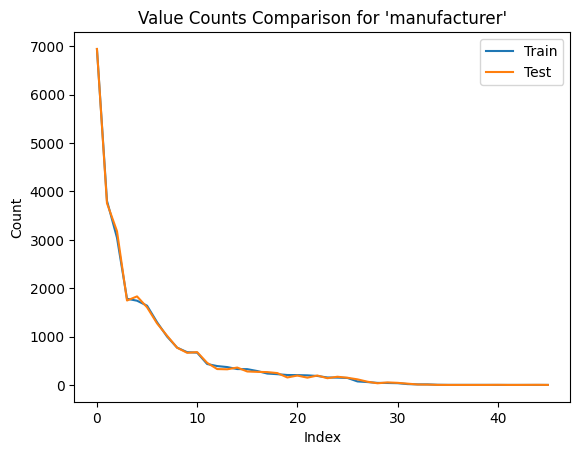

順位相関係数: 0.9798994822379019
p値: 1.9181512884643499e-32
有意です。


In [24]:
calculate_spearmanr(train, test, "manufacturer")

## condition

特に問題なさそう、ラベリングの問題だけかな

In [25]:
train["condition"].value_counts(), train["condition"].unique()

(condition
 excellent    15219
 good          6009
 like new      3810
 fair          2404
 new             55
 salvage         35
 Name: count, dtype: int64,
 array(['excellent', 'fair', 'good', 'like new', 'salvage', 'new'],
       dtype=object))

In [26]:
test["condition"].value_counts(), test["condition"].unique()

(condition
 excellent    15221
 good          6011
 like new      3837
 fair          2369
 new             61
 salvage         38
 Name: count, dtype: int64,
 array(['excellent', 'like new', 'good', 'fair', 'new', 'salvage'],
       dtype=object))

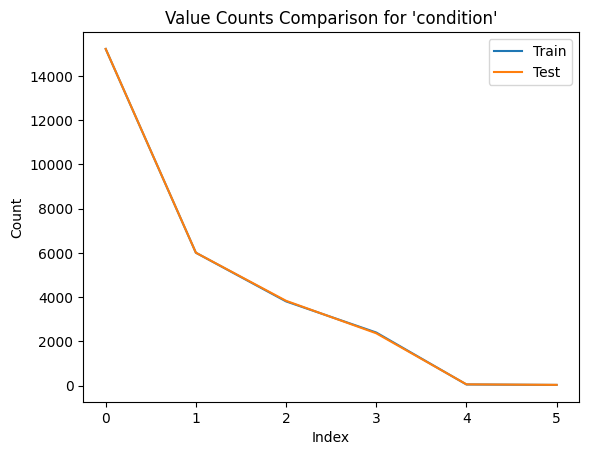

順位相関係数: 1.0
p値: 0.0
有意です。


In [27]:
calculate_spearmanr(train, test, "condition")

## cylinders

問題ないかな～

In [28]:
train["cylinders"].value_counts(), train["cylinders"].unique()

(cylinders
 6 cylinders     11504
 4 cylinders     10071
 8 cylinders      5727
 other              71
 10 cylinders       60
 5 cylinders        46
 3 cylinders        31
 12 cylinders       22
 Name: count, dtype: int64,
 array(['6 cylinders', '8 cylinders', '4 cylinders', 'other',
        '10 cylinders', '12 cylinders', '5 cylinders', '3 cylinders'],
       dtype=object))

In [29]:
test["cylinders"].value_counts(), test["cylinders"].unique()

(cylinders
 6 cylinders     11697
 4 cylinders      9998
 8 cylinders      5613
 other              78
 5 cylinders        61
 10 cylinders       57
 3 cylinders        24
 12 cylinders        9
 Name: count, dtype: int64,
 array(['4 cylinders', '6 cylinders', '8 cylinders', '10 cylinders',
        '5 cylinders', 'other', '12 cylinders', '3 cylinders'],
       dtype=object))

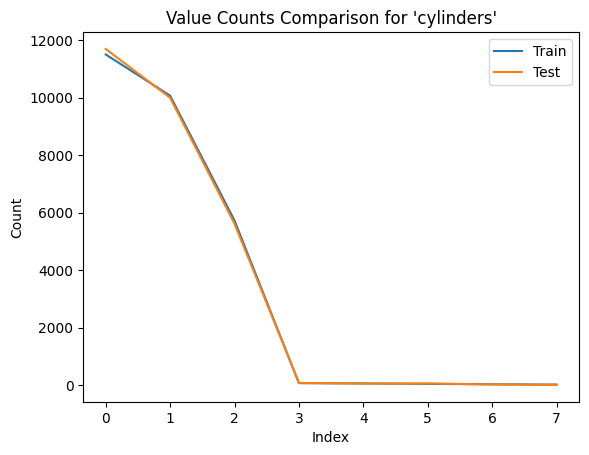

順位相関係数: 0.9761904761904763
p値: 3.3143960262001043e-05
有意です。


In [30]:
calculate_spearmanr(train, test, "cylinders")

## fuel

欠損値あり

In [31]:
train["fuel"].value_counts(), train["fuel"].unique()

(fuel
 gas         23546
 diesel       2639
 hybrid         79
 other          18
 electric       11
 Name: count, dtype: int64,
 array(['gas', nan, 'diesel', 'other', 'hybrid', 'electric'], dtype=object))

In [32]:
test["fuel"].value_counts(), test["fuel"].unique()

(fuel
 gas         23427
 diesel       2515
 hybrid         65
 other          21
 electric       14
 Name: count, dtype: int64,
 array(['gas', 'diesel', nan, 'hybrid', 'other', 'electric'], dtype=object))

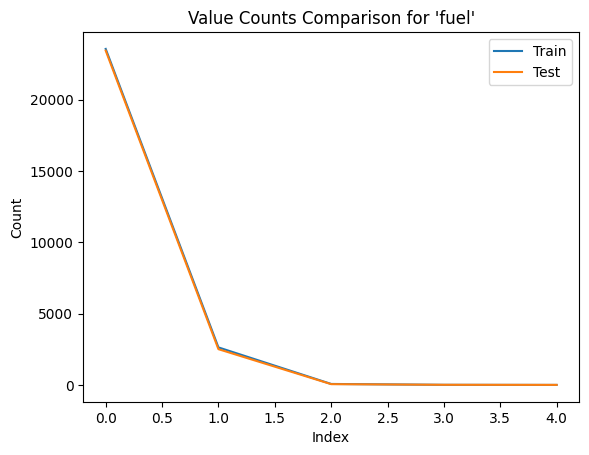

順位相関係数: 0.9999999999999999
p値: 1.4042654220543672e-24
有意です。


In [33]:
calculate_spearmanr(train, test, "fuel")

## odometer

欠損値-1になっている

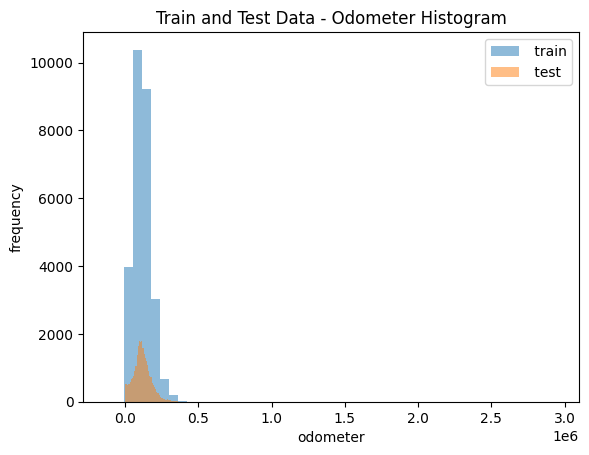

In [34]:
plt.hist(train["odometer"], alpha=0.5, label=" train", bins=50)
plt.hist(test["odometer"], alpha=0.5, label=" test", bins=50)

plt.xlabel("odometer")
plt.ylabel("frequency")
plt.title("Train and Test Data - Odometer Histogram")
plt.legend()

plt.show()

In [35]:
train["odometer"].describe(), test["odometer"].describe()

(count    2.753200e+04
 mean     1.160199e+05
 std      6.451642e+04
 min     -1.318690e+05
 25%      7.836775e+04
 50%      1.114445e+05
 75%      1.508562e+05
 max      2.946000e+06
 Name: odometer, dtype: float64,
 count     27537.000000
 mean     116592.779932
 std       59040.921780
 min          -1.000000
 25%       79914.000000
 50%      112436.000000
 75%      150338.000000
 max      394595.000000
 Name: odometer, dtype: float64)

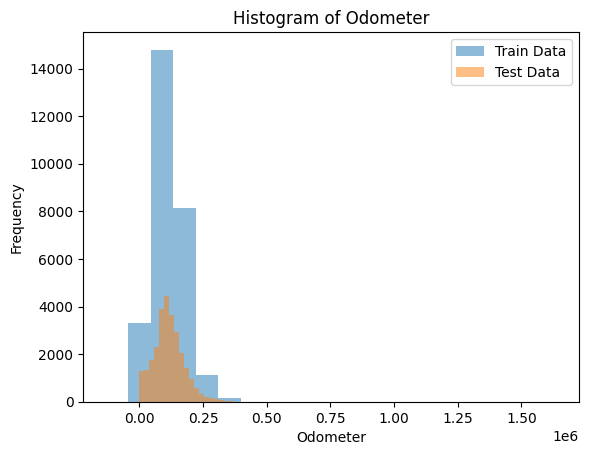

In [36]:
def plot_histogram_without_outliers(train, test):
    train_without_outliers = train[train["odometer"] < train["odometer"].max()]  # 一番大きな値を取り除く
    test_without_outliers = test[test["odometer"] < test["odometer"].max()]  # 一番大きな値を取り除く

    plt.hist(train_without_outliers["odometer"], bins=20, alpha=0.5, label="Train Data")
    plt.hist(test_without_outliers["odometer"], bins=20, alpha=0.5, label="Test Data")

    plt.xlabel("Odometer")
    plt.ylabel("Frequency")
    plt.title("Histogram of Odometer")
    plt.legend()
    plt.show()

# 使用例
plot_histogram_without_outliers(train, test)

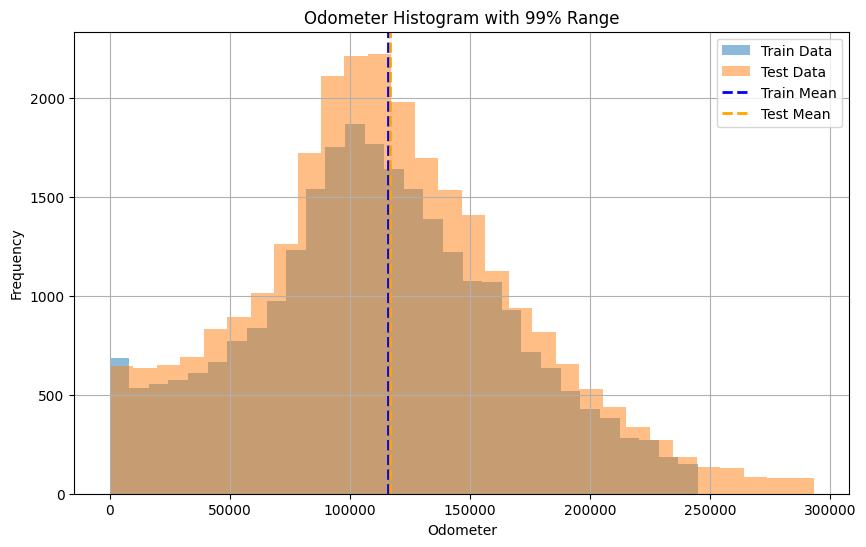

In [37]:
def plot_histogram_with_95_percent_range(train, test):
    plt.figure(figsize=(10, 6))

    # トレーニングデータのヒストグラムを描画
    train_mean = train["odometer"].mean()
    train_std = train["odometer"].std()
    train_lower_bound = train_mean - 2 * train_std # 正規分布を仮定
    train_upper_bound = train_mean + 2 * train_std
    train_filtered = train[(train["odometer"] >= train_lower_bound) & (train["odometer"] <= train_upper_bound)]

    plt.hist(train_filtered["odometer"], bins=30, alpha=0.5, label="Train Data")

    # テストデータのヒストグラムを描画
    test_mean = test["odometer"].mean()
    test_std = test["odometer"].std()
    test_lower_bound = test_mean - 3 * test_std # 正規分布を仮定
    test_upper_bound = test_mean + 3 * test_std
    test_filtered = test[(test["odometer"] >= test_lower_bound) & (test["odometer"] <= test_upper_bound)]

    plt.hist(test_filtered["odometer"], bins=30, alpha=0.5, label="Test Data")

    plt.axvline(train_mean, color='blue', linestyle='dashed', linewidth=2, label='Train Mean')
    plt.axvline(test_mean, color='orange', linestyle='dashed', linewidth=2, label='Test Mean')

    plt.xlabel("Odometer")
    plt.ylabel("Frequency")
    plt.title("Odometer Histogram with 99% Range")
    plt.legend()
    plt.grid(True)
    plt.show()

# 使用例
plot_histogram_with_95_percent_range(train, test)

## title_status

欠損値あり

In [38]:
train["title_status"].value_counts(), train["title_status"].unique()

(title_status
 clean         22365
 rebuilt        3004
 salvage         985
 lien            465
 parts only      133
 missing         124
 Name: count, dtype: int64,
 array(['clean', 'rebuilt', nan, 'parts only', 'salvage', 'missing',
        'lien'], dtype=object))

In [39]:
test["title_status"].value_counts(), test["title_status"].unique()

(title_status
 clean         22716
 rebuilt        2959
 salvage         938
 lien            420
 parts only      157
 missing         118
 Name: count, dtype: int64,
 array(['clean', 'salvage', 'rebuilt', 'lien', 'missing', nan,
        'parts only'], dtype=object))

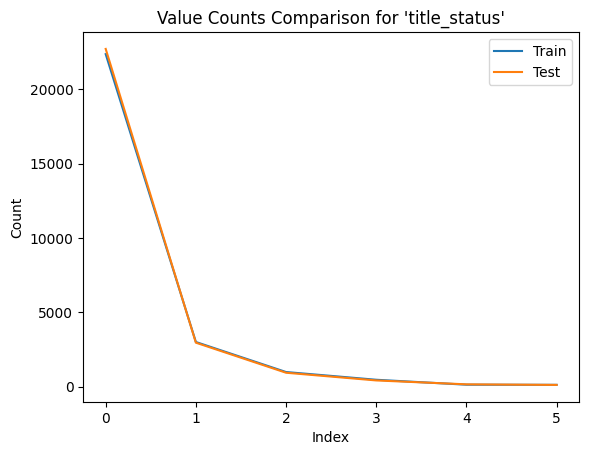

順位相関係数: 1.0
p値: 0.0
有意です。


In [40]:
calculate_spearmanr(train, test, "title_status")

## transmission

問題なさそう

In [41]:
train["transmission"].value_counts(), train["transmission"].unique()

(transmission
 automatic    20497
 manual        6156
 other          879
 Name: count, dtype: int64,
 array(['manual', 'automatic', 'other'], dtype=object))

In [42]:
test["transmission"].value_counts(), test["transmission"].unique()

(transmission
 automatic    20493
 manual        6176
 other          868
 Name: count, dtype: int64,
 array(['automatic', 'manual', 'other'], dtype=object))

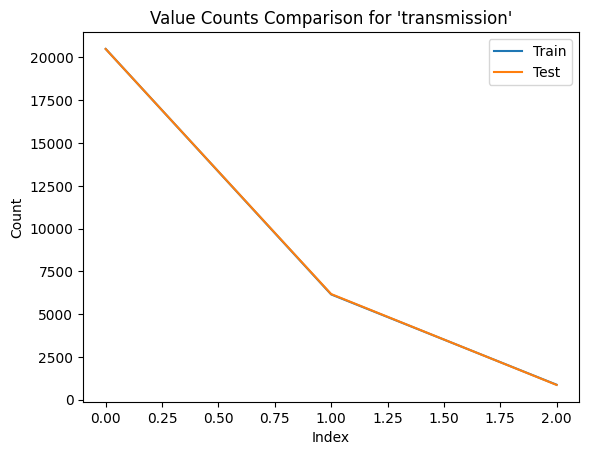

順位相関係数: 1.0
p値: 0.0
有意です。


In [43]:
calculate_spearmanr(train, test, "transmission")

## drive

問題なさそう

In [44]:
train["drive"].value_counts(), train["drive"].unique()

(drive
 fwd    14602
 4wd     8096
 rwd     4834
 Name: count, dtype: int64,
 array(['rwd', 'fwd', '4wd'], dtype=object))

In [45]:
test["drive"].value_counts(), test["drive"].unique()

(drive
 fwd    14611
 4wd     8006
 rwd     4920
 Name: count, dtype: int64,
 array(['fwd', '4wd', 'rwd'], dtype=object))

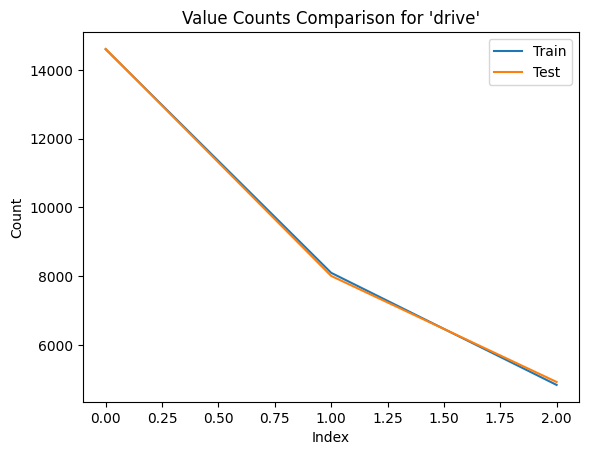

順位相関係数: 1.0
p値: 0.0
有意です。


In [46]:
calculate_spearmanr(train, test, "drive")

## size

sub--compact, full--size, mid--sizeってミスかな

In [47]:
def pre_size(df: pd.DataFrame):
    size_dict = {
        "fullーsize":"full-size",
        "midーsize":"mid-size",
        "subーcompact":"sub-compact",
        "full−size":"full-size",
        "mid−size":"mid-size"
    }
    df["size"] = df["size"].replace(size_dict)
    return df

In [48]:
train["size"].value_counts(), train["size"].unique()

(size
 full-size      14585
 mid-size        9371
 compact         3352
 sub-compact      132
 fullーsize         42
 midーsize          35
 full−size          9
 mid−size           5
 subーcompact        1
 Name: count, dtype: int64,
 array(['mid-size', 'full-size', 'sub-compact', 'compact', 'full−size',
        'fullーsize', 'mid−size', 'midーsize', 'subーcompact'], dtype=object))

In [49]:
test["size"].value_counts(), test["size"].unique()

(size
 full-size      14663
 mid-size        9338
 compact         3297
 sub-compact      148
 fullーsize         41
 midーsize          28
 full−size         16
 mid−size           5
 subーcompact        1
 Name: count, dtype: int64,
 array(['full-size', 'mid-size', 'compact', 'sub-compact', 'midーsize',
        'fullーsize', 'mid−size', 'full−size', 'subーcompact'], dtype=object))

In [50]:
train = pre_size(train)
test = pre_size(test)

In [51]:
train["size"].value_counts(), train["size"].unique()

(size
 full-size      14636
 mid-size        9411
 compact         3352
 sub-compact      133
 Name: count, dtype: int64,
 array(['mid-size', 'full-size', 'sub-compact', 'compact'], dtype=object))

In [52]:
test["size"].value_counts(), test["size"].unique()

(size
 full-size      14720
 mid-size        9371
 compact         3297
 sub-compact      149
 Name: count, dtype: int64,
 array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object))

In [53]:
set(train["size"]) - set(test["size"]), set(test["size"]) - set(train["size"])

(set(), set())

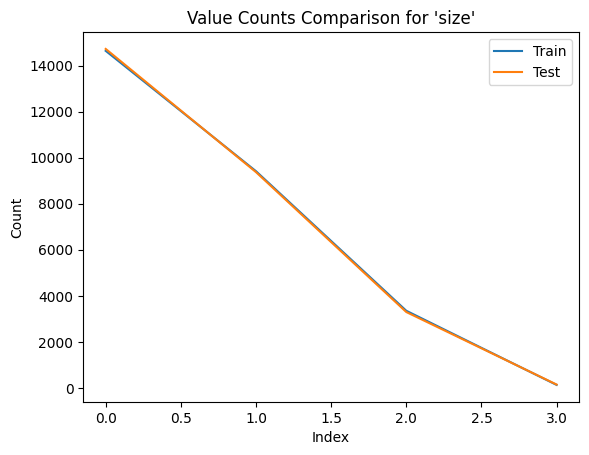

順位相関係数: 1.0
p値: 0.0
有意です。


In [54]:
calculate_spearmanr(train, test, "size")

## type

欠損値あり

In [55]:
train["type"].value_counts(), train["type"].unique()

(type
 sedan          9259
 SUV            7311
 truck          3837
 coupe          2255
 pickup         2118
 hatchback       665
 van             537
 convertible     418
 mini-van        229
 wagon           210
 other           139
 offroad          79
 bus              19
 Name: count, dtype: int64,
 array(['convertible', 'sedan', 'SUV', 'coupe', nan, 'mini-van', 'pickup',
        'truck', 'van', 'hatchback', 'wagon', 'offroad', 'other', 'bus'],
       dtype=object))

In [56]:
test["type"].value_counts(), test["type"].unique()

(type
 sedan          9476
 SUV            7255
 truck          3788
 coupe          2334
 pickup         2131
 hatchback       669
 van             543
 convertible     461
 mini-van        245
 wagon           202
 other           112
 offroad          76
 bus              16
 Name: count, dtype: int64,
 array(['SUV', 'sedan', 'truck', 'coupe', 'hatchback', 'pickup', 'van',
        nan, 'mini-van', 'wagon', 'other', 'convertible', 'bus', 'offroad'],
       dtype=object))

In [57]:
set(train["type"]) - set(test["type"]), set(test["type"]) - set(train["type"])

(set(), set())

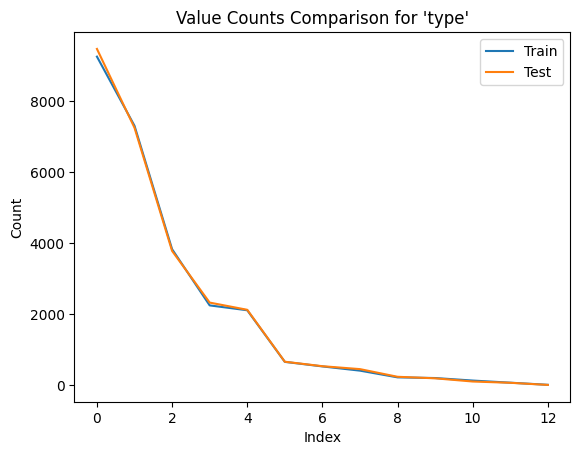

順位相関係数: 1.0
p値: 0.0
有意です。


In [58]:
calculate_spearmanr(train, test, "type")

## paint_color

In [59]:
train["paint_color"].value_counts(), train["paint_color"].unique()

(paint_color
 black     10143
 silver     4300
 blue       3765
 white      3624
 green      2385
 red        1419
 grey       1136
 brown       365
 custom      197
 orange      144
 yellow       30
 purple       24
 Name: count, dtype: int64,
 array(['orange', 'silver', 'blue', 'red', 'black', 'white', 'green',
        'brown', 'grey', 'purple', 'custom', 'yellow'], dtype=object))

In [60]:
test["paint_color"].value_counts(), test["paint_color"].unique()

(paint_color
 black     10081
 silver     4369
 blue       3858
 white      3639
 green      2285
 red        1413
 grey       1120
 brown       387
 custom      202
 orange      125
 yellow       34
 purple       24
 Name: count, dtype: int64,
 array(['red', 'black', 'silver', 'green', 'yellow', 'blue', 'brown',
        'white', 'orange', 'grey', 'custom', 'purple'], dtype=object))

In [61]:
set(train["paint_color"]) - set(test["paint_color"]), set(test["paint_color"]) - set(train["paint_color"])

(set(), set())

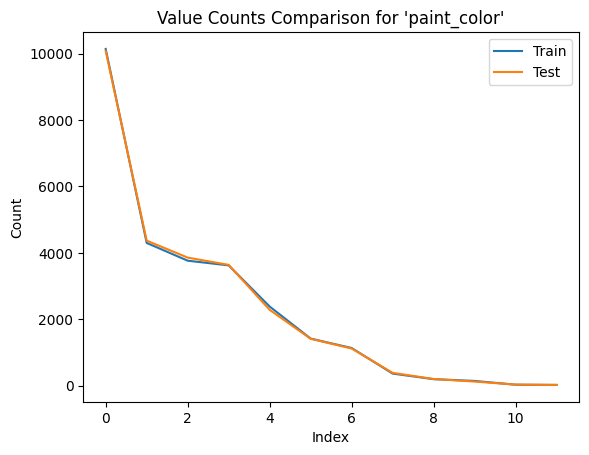

順位相関係数: 1.0
p値: 0.0
有意です。


In [62]:
calculate_spearmanr(train, test, "paint_color")

## state

欠損値あり、アメリカかな

In [63]:
train["state"].value_counts(), train["state"].unique(), len(train["state"].unique())

(state
 ca    2702
 ny    1841
 fl    1650
 nj    1413
 tx    1274
 pa     983
 oh     849
 va     766
 mi     739
 az     706
 co     705
 nc     636
 ri     631
 wi     626
 tn     595
 or     577
 mn     521
 dc     427
 id     425
 il     409
 ma     389
 nv     369
 ia     366
 in     345
 wa     317
 nm     287
 ct     278
 md     274
 ok     267
 mo     262
 ks     252
 ga     251
 mt     249
 sc     244
 ky     229
 al     152
 vt     138
 hi     123
 ne     115
 ut     111
 ak     108
 de     101
 nd      98
 la      85
 nh      85
 sd      77
 me      68
 ar      37
 wv      36
 wy      24
 ms      16
 Name: count, dtype: int64,
 array([nan, 'pa', 'ks', 'ny', 'ca', 'al', 'or', 'va', 'mt', 'nj', 'ma',
        'wi', 'sc', 'wa', 'dc', 'oh', 'in', 'de', 'fl', 'nm', 'az', 'ok',
        'mn', 'co', 'nv', 'wv', 'tn', 'mi', 'ri', 'il', 'tx', 'ut', 'ia',
        'ga', 'md', 'mo', 'ky', 'nc', 'ak', 'id', 'ct', 'wy', 'nd', 'me',
        'ar', 'hi', 'sd', 'ne', 'nh', 'vt', 'la', 'ms'], d

In [64]:
test["state"].value_counts(), test["state"].unique(), len(test["state"].unique())

(state
 ca    2639
 ny    1960
 fl    1651
 nj    1479
 tx    1205
 pa     992
 oh     831
 mi     819
 az     719
 va     716
 co     678
 ri     653
 nc     649
 or     607
 wi     559
 mn     534
 tn     515
 id     443
 dc     433
 ma     429
 nv     419
 ia     389
 il     385
 wa     349
 in     347
 nm     298
 mo     289
 ct     288
 mt     279
 ks     275
 ga     273
 sc     263
 ok     262
 md     250
 ky     208
 al     182
 vt     157
 hi     118
 ne     115
 ut     102
 de     101
 nd      91
 nh      90
 la      87
 sd      84
 ak      83
 me      71
 ar      53
 wv      36
 ms      30
 wy      23
 Name: count, dtype: int64,
 array([nan, 'or', 'oh', 'co', 'nc', 'ny', 'ut', 'ms', 'mn', 'fl', 'nj',
        'mo', 'ri', 'md', 'tx', 'pa', 'tn', 'ca', 'mi', 'va', 'wa', 'mt',
        'in', 'il', 'hi', 'sc', 'wi', 'ct', 'ks', 'dc', 'ma', 'ne', 'ky',
        'vt', 'id', 'az', 'ia', 'nv', 'ok', 'de', 'nm', 'sd', 'ga', 'nh',
        'me', 'nd', 'la', 'al', 'ak', 'ar', 'wv', 'wy'], d

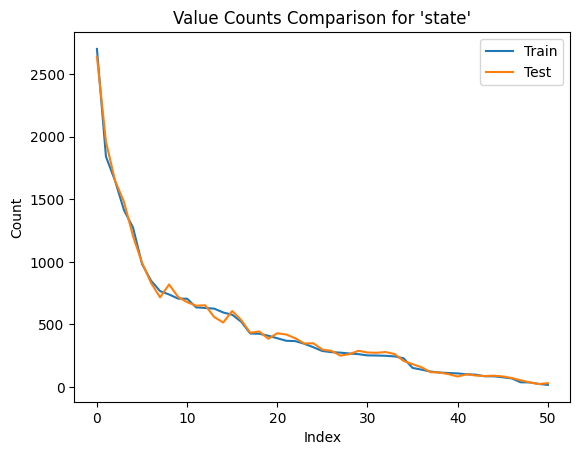

順位相関係数: 0.9931898914282096
p値: 2.0356046316047743e-47
有意です。


In [65]:
calculate_spearmanr(train, test, "state")

## price

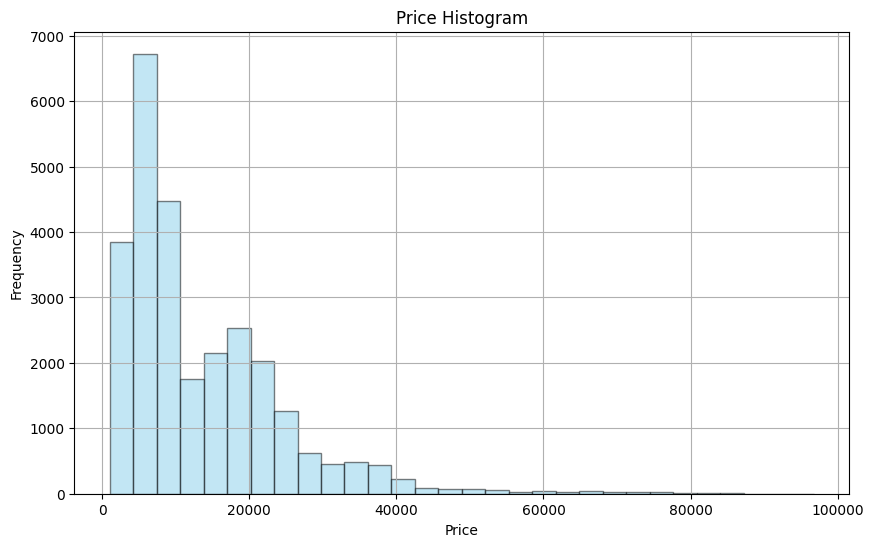

In [66]:
def plot_price_histogram(train):
    plt.figure(figsize=(10, 6))

    plt.hist(train["price"], bins=30, alpha=0.5, color='skyblue', edgecolor='black')

    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.title("Price Histogram")
    plt.grid(True)
    plt.show()

# 使用例
plot_price_histogram(train)

c:\Users\Komiyama Yuji\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

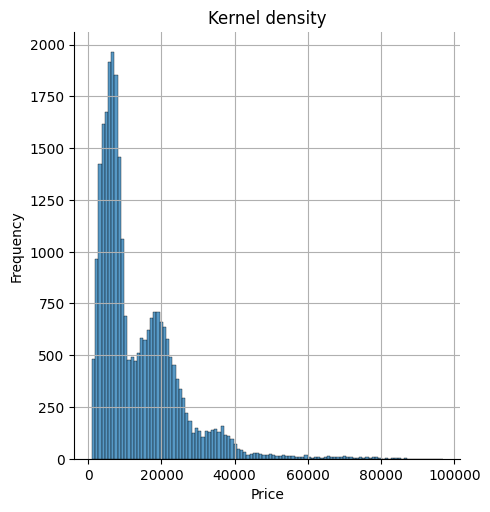

In [83]:
def plot_price_histogram(train):
    plt.figure(figsize=(10, 6))

    sns.displot(train["price"])

    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.title("Kernel density")
    plt.grid(True)
    plt.show()

# 使用例
plot_price_histogram(train)

In [68]:
class CFG:
    n_splits = 5
    target_bins = 20
    seed = 42

In [69]:
train.sort_values(by="id", ignore_index=True, inplace=True)

train["year_map"], bins = pd.cut(train["year"], bins=20, labels=False, retbins=True)
test["year_map"] = pd.cut(test["year"], bins=bins, labels=False)
train["price_map"] = pd.cut(train["price"], bins=CFG.target_bins, labels=False)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=CFG.n_splits, shuffle=True, random_state=CFG.seed)
for i, (_, val) in enumerate(skf.split(X=train, y=train["price_map"])):
    train.loc[val, "fold"] = i
print(train["fold"].value_counts())
print(train.groupby("fold")["price"].mean().std())

fold
1.0    5507
0.0    5507
2.0    5506
4.0    5506
3.0    5506
Name: count, dtype: int64
8.784566908616718


c:\Users\Komiyama Yuji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [70]:
train[train["price"] < 10000]["year"].unique()

array([2013, 2005, 2014, 2006, 2012, 2010, 1999, 1995, 1996, 2008, 2015,
       2003, 2009, 1992, 1988, 2004, 2016, 1998, 2007, 2002, 1989, 2011,
       2001, 1990, 1994, 1987, 1953, 1978, 1973, 1983, 1984, 2017, 1997,
       1993, 2000, 1967, 1976, 1974, 2019, 1980, 1982, 1986, 1971, 1991,
       1985, 1957, 1962, 1968, 1970, 2018, 1956, 2020, 1972, 1979, 1966,
       1963, 1942, 1981, 1955, 1965, 2021, 1952, 1961, 1964, 1969, 1922,
       1975, 1946, 1928, 1977, 1960, 1950, 1937, 1958, 1935, 1938, 1948,
       1930, 1954], dtype=int64)

In [71]:
train["price"].describe()

count    27532.000000
mean     13468.724829
std      10962.149840
min       1004.000000
25%       5759.000000
50%       9206.000000
75%      19128.000000
max      96818.000000
Name: price, dtype: float64

In [72]:
get_score(y_true=[2], y_pred=[4]), get_score(y_true=[2000], y_pred=[2004]), get_score(y_true=[2000], y_pred=[4000])

(100.0, 0.2, 100.0)

価格が安いものをしっかりと安いと評価できるようなモデルにすると評価指標に合う

In [73]:
train.columns

Index(['id', 'region', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'price', 'year_map', 'price_map',
       'fold'],
      dtype='object')

In [74]:
train[train["price"] <  train["price"].max() * 0.2].shape, train[train["price"] >  train["price"].max() * 0.2].shape

((20845, 19), (6687, 19))

In [75]:
train["price"].max(), train["price"].min()

(96818, 1004)

In [76]:
train[(train["price"] == train["price"].max())|(train["price"] == train["price"].min())]

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,year_map,price_map,fold
16550,16550,lakeland,2016,chevrolet,excellent,8 cylinders,diesel,62997,clean,automatic,4wd,full-size,SUV,red,fl,96818,18,19,4.0
23907,23907,harrisburg,2000,ford,good,6 cylinders,gas,105228,clean,automatic,fwd,mid-size,SUV,green,pa,1004,15,0,3.0


## train_test_split

In [77]:
categorical_features = ['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 
                        'drive', 'size', 'type', 'paint_color', 'state', "year_map"]

In [78]:
def calculate_spearmanr(train_data, test_data, column_name, plot = False):
    """
    train_data: pandas DataFrame, training dataset
    test_data: pandas DataFrame, test dataset
    column_name: str, name of the column for which Spearman's rank correlation will be calculated
    """
    # Calculate value counts for the specified column in the training and test datasets
    train_counts = train_data[column_name].value_counts().reset_index(name="train")
    test_counts = test_data[column_name].value_counts().reset_index(name="test")
    
    # Merge the two datasets on the column index
    merged_data = pd.merge(train_counts, test_counts, on="index")
    if plot:
        # Plot the value counts for both training and test datasets
        plt.plot(merged_data["train"], label="Train")
        plt.plot(merged_data["test"], label="Test")
        plt.legend()
        plt.xlabel("Index")
        plt.ylabel("Count")
        plt.title(f"Value Counts Comparison for '{column_name}'")
        plt.show()

    # Calculate Spearman's rank correlation coefficient and p-value
    correlation, p_value = spearmanr(merged_data["train"], merged_data["test"])

    print("順位相関係数:", correlation)

In [79]:
# ===================================================================
#  train test split
# ===================================================================
from sklearn.model_selection import KFold, StratifiedKFold
train.fillna(value="-1", inplace=True)
train.sort_values(by="id", ignore_index=True, inplace=True)
train["price_map"] = pd.cut(train["price"], bins=10, labels=False)
train["year_map"] = pd.cut(train["year"], bins=10, labels=False)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for i, (_, val) in enumerate(kf.split(X=train)):
    train.loc[val, "fold"] = i
    
print(train["fold"].value_counts())
print(train.groupby("fold")["price"].mean().std())

fold
1.0    2754
0.0    2754
3.0    2753
7.0    2753
6.0    2753
4.0    2753
2.0    2753
9.0    2753
5.0    2753
8.0    2753
Name: count, dtype: int64
273.28259606982635


In [80]:

train.fillna(value="-1", inplace=True)
train.sort_values(by="id", ignore_index=True, inplace=True)
train["year_map"] = pd.cut(train["year"], bins=10, labels=False)
train["price_map"] = pd.cut(train["price"], bins=10, labels=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for i, (_, val) in enumerate(kf.split(X=train, y=train["price_map"])):
    train.loc[val, "fold"] = i
    
print(train["fold"].value_counts())
print(train.groupby("fold")["price"].mean().std())

fold
1.0    2754
0.0    2754
2.0    2753
4.0    2753
6.0    2753
3.0    2753
7.0    2753
8.0    2753
5.0    2753
9.0    2753
Name: count, dtype: int64
34.38316956667607


c:\Users\Komiyama Yuji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


In [81]:
for fold in range(1, 10):
    print('\033[32m'+f" ========== fold0 vs fold{fold} =========="+'\033[0m')
    for col in categorical_features:
        print(col)
        calculate_spearmanr(train[train["fold"] == 0], train[train["fold"] == fold], column_name=col, plot = False)

 ========== fold0 vs fold1 ==========
region


KeyError: 'index'

In [ ]:
tmp = []
# categorical_features is the list of the first two categorical features
for col in categorical_features:
    mean_odometer_by_category = train.groupby(col)["price"].mean()
    tmp.append(train.groupby(col)["price"].mean().std())
df_2 = pd.DataFrame(zip(categorical_features, tmp, [len(train[col].unique()) for col in categorical_features]), columns=["feature", "std", "len"],)
df_2.sort_values("std", ascending=False, ignore_index=True)

,feature,std,len
0,fuel,5413.273688,6
1,year_map,5394.883994,10
2,manufacturer,5143.337572,46
3,drive,4516.169195,3
4,condition,3999.853493,6
5,region,3598.950969,372
6,type,3539.821715,14
7,size,2866.425386,4
8,cylinders,2820.953658,8
9,title_status,2485.028366,7


In [ ]:
# ===================================================================
#  train test split
# ===================================================================
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

train.fillna(value="-1", inplace=True)

train.sort_values(by="id", ignore_index=True, inplace=True)
train["year_map"] = pd.cut(train["year"], bins=10, labels=False)
train["price_map"] = pd.cut(train["price"], bins=10, labels=False)
train["price_map_"] = pd.cut(train["price"], bins=20, labels=False)

kf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for i, (_, val) in enumerate(kf.split(X=train, y=train[["year_map", "price_map", 'region', 'manufacturer', 'condition', 'cylinders','fuel',
                                                        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
                                                        'state', "price_map_"]])):
    train.loc[val, "fold"] = i
    
print(train["fold"].value_counts())
print(train.groupby("fold")["price"].mean().std())


0.0    2755
6.0    2754
8.0    2754
1.0    2753
2.0    2753
7.0    2753
9.0    2753
5.0    2753
3.0    2752
4.0    2752
Name: fold, dtype: int64
103.45628134809876


In [ ]:
tmp = []
# categorical_features is the list of the first two categorical features
for col in categorical_features:
    mean_odometer_by_category = train.groupby(col)["price"].mean()
    tmp.append(train.groupby(col)["price"].mean().std())
df_3 = pd.DataFrame(zip(categorical_features, tmp, [len(train[col].unique()) for col in categorical_features]), columns=["feature", "std", "len"],)
df_3.sort_values("std", ascending=False, ignore_index=True)

,feature,std,len
0,fuel,5413.273688,6
1,year_map,5394.883994,10
2,manufacturer,5143.337572,46
3,drive,4516.169195,3
4,condition,3999.853493,6
5,region,3598.950969,372
6,type,3539.821715,14
7,size,2866.425386,4
8,cylinders,2820.953658,8
9,title_status,2485.028366,7


In [ ]:
df = pd.merge(df_1[["feature", "std"]].rename(columns={"std":"KFold_std"}), df_2[["feature", "std"]].rename(columns={"std":"StratifiedKFold_std"}), on="feature")
df = pd.merge(df, df_3[["feature", "std"]].rename(columns={"std":"MultiLabelStratifiedKFold_std"}), on="feature")

In [ ]:
df

,feature,KFold_std,StratifiedKFold_std,MultiLabelStratifiedKFold_std
0,region,3598.950969,3598.950969,3598.950969
1,manufacturer,5143.337572,5143.337572,5143.337572
2,condition,3999.853493,3999.853493,3999.853493
3,cylinders,2820.953658,2820.953658,2820.953658
4,fuel,5413.273688,5413.273688,5413.273688
5,title_status,2485.028366,2485.028366,2485.028366
6,transmission,1037.939257,1037.939257,1037.939257
7,drive,4516.169195,4516.169195,4516.169195
8,size,2866.425386,2866.425386,2866.425386
9,type,3539.821715,3539.821715,3539.821715


In [ ]:
train.fillna(value="-1", inplace=True)
train.sort_values(by="id", ignore_index=True, inplace=True)
train["year_map"] = pd.cut(train["year"], bins=10, labels=False)
train["price_map"] = pd.cut(train["price"], bins=10, labels=False)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for i, (_, val) in enumerate(kf.split(X=train, y=train["price_map"])):
    train.loc[val, "fold"] = i
    
print(train["fold"].value_counts())
print(train.groupby("fold")["price"].mean().std())

1.0    2754
0.0    2754
2.0    2753
4.0    2753
6.0    2753
3.0    2753
7.0    2753
8.0    2753
5.0    2753
9.0    2753
Name: fold, dtype: int64
34.38316956667607


c:\Users\Komiyama Yuji\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


## odometerの修正

In [ ]:
train = train[(train["odometer"] > 100)&(train["odometer"] < 400000)].reset_index(drop=True)

In [ ]:
tmp = []
# categorical_features is the list of the first two categorical features
for col in categorical_features:
    mean_odometer_by_category = train.groupby(col)["odometer"].mean()
    tmp.append(train.groupby(col)["odometer"].mean().std())
df = pd.DataFrame(zip(categorical_features, tmp, [len(train[col].unique()) for col in categorical_features]), columns=["feature", "std", "len"],)
df.sort_values("std", ascending=False)

,feature,std,len
12,year_map,31781.158448,10
4,fuel,29617.927026,6
2,condition,26189.870015,6
1,manufacturer,23019.170311,46
0,region,21126.085990,372
9,type,18606.445907,14
10,paint_color,17499.838479,12
7,drive,13320.597407,3
5,title_status,12292.031506,7
3,cylinders,12220.892044,8
